In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

print("環境設定完了")

環境設定完了


In [ ]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=np.float32)
y = np.array([[0], [0], [0], [1]], dtype=np.float32)

print("入力 X:")
print(X)
print("出力 y:")
print(y)

入力 X:
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
出力 y:
[[0.]
 [0.]
 [0.]
 [1.]]


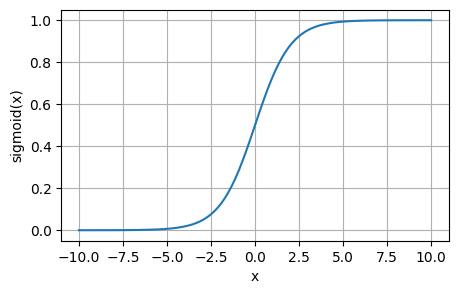

In [ ]:
# シグモイド関数
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# シグモイド関数のグラフを表示
x = np.linspace(-10, 10, 100)   # 絶対いる
plt.figure(figsize=(5, 3))
plt.plot(x, sigmoid(x))         # 絶対いる
plt.xlabel("x")
plt.ylabel("sigmoid(x)")
plt.grid(True)
plt.show()                      # 表示

In [ ]:
def initialize_parameters(input_size):
    np.random.seed(42)  # 再現性のため
    weights = np.random.randn(input_size, 1).astype(np.float32)
    bias = np.zeros((1,), dtype=np.float32)
    return weights, bias

input_size = X.shape[1]     # 入力データの個数
weights, bias = initialize_parameters(input_size)

print("初期化された重み:")
print(weights.flatten())
print("初期化されたバイアス:")
print(bias[0])

初期化された重み:
[ 0.49671414 -0.1382643 ]
初期化されたバイアス:
0.0


In [ ]:
def predict(X, weights, bias):
    return sigmoid(np.dot(X, weights) + bias)

# 初期パラメータで予測
initial_predictions = predict(X, weights, bias)
print("初期パラメータでの予測:")
for x_i, y_i, pred in zip(X, y, initial_predictions):
    print(f"入力: {x_i}, 出力: {y_i}, 予測: {pred[0]:.4f}")


初期パラメータでの予測:
入力: [0. 0.], 出力: [0.], 予測: 0.5000
入力: [0. 1.], 出力: [0.], 予測: 0.4655
入力: [1. 0.], 出力: [0.], 予測: 0.6217
入力: [1. 1.], 出力: [1.], 予測: 0.5887


In [ ]:
# 損失関数（二値交差エントロピー）
def calculate_loss(y_true, y_pred):
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

# 勾配の計算
def calculate_gradients(X, y, y_pred):
    m = len(y)
    dZ = y_pred - y
    dW = np.dot(X.T, dZ) / m
    db = np.sum(dZ) / m
    return dW, db

# 初期パラメータでの損失
initial_loss = calculate_loss(y, initial_predictions)
print(f"初期パラメータでの損失: {initial_loss:.4f}")

# 初期勾配
initial_dw, initial_db = calculate_gradients(X, y, initial_predictions)
print(f"初期の重みの勾配dW: {initial_dw.flatten()}")
print(f"初期のバイアスの勾配db: {initial_db}")

初期パラメータでの損失: 0.7054
初期の重みの勾配dW: [0.05258799 0.01353849]
初期のバイアスの勾配db: 0.29396018385887146


In [ ]:
# 学習
def train(X, y, weights, bias, learing_rate=0.01, epochs=1000):
    history = {'loss':[], 'accuracy':[]}
    for epoch in range(epochs):
        # 順伝搬（予測）
        y_pred = predict(X, weights, bias)
        # 損失の計算
        loss = calculate_loss(y, y_pred)
        # 勾配の計算
        dw, db = calculate_gradients(X, y, y_pred)
        # パラメータの更新
        weights -= learing_rate * dw
        bias -= learing_rate * db

        # 精度の計算
        y_pred_class = (y_pred >= 0.5).astype(np.float32)
        accuracy = np.mean(y_pred_class == y)

        # 履歴の記録
        history['loss'].append(loss)
        history['accuracy'].append(accuracy)
        if epoch % 100 == 0:
            print(f"Epoch {epoch}, Loss: {loss:.4f}, Accuracy: {accuracy:.4f}")
    return weights, bias, history

# 学習の実行
epochs = 2000
weights, bias, history = train(X, y, weights, bias, epochs=epochs)


Epoch 0, Loss: 0.7054, Accuracy: 0.5000
Epoch 100, Loss: 0.6368, Accuracy: 0.7500
Epoch 200, Loss: 0.5946, Accuracy: 0.7500
Epoch 300, Loss: 0.5651, Accuracy: 0.7500
Epoch 400, Loss: 0.5421, Accuracy: 0.7500
Epoch 500, Loss: 0.5227, Accuracy: 0.7500
Epoch 600, Loss: 0.5054, Accuracy: 0.7500
Epoch 700, Loss: 0.4897, Accuracy: 0.7500
Epoch 800, Loss: 0.4752, Accuracy: 0.7500
Epoch 900, Loss: 0.4617, Accuracy: 0.7500
Epoch 1000, Loss: 0.4490, Accuracy: 0.7500
Epoch 1100, Loss: 0.4371, Accuracy: 0.7500
Epoch 1200, Loss: 0.4259, Accuracy: 0.7500
Epoch 1300, Loss: 0.4153, Accuracy: 0.7500
Epoch 1400, Loss: 0.4053, Accuracy: 0.7500
Epoch 1500, Loss: 0.3958, Accuracy: 1.0000
Epoch 1600, Loss: 0.3868, Accuracy: 1.0000
Epoch 1700, Loss: 0.3783, Accuracy: 1.0000
Epoch 1800, Loss: 0.3701, Accuracy: 1.0000
Epoch 1900, Loss: 0.3624, Accuracy: 1.0000


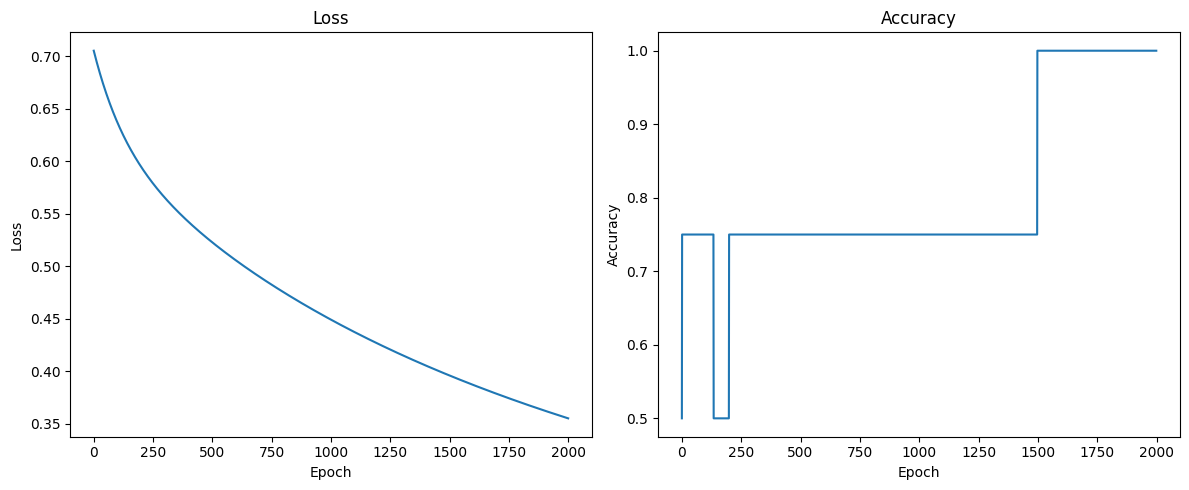

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history['loss'])
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(history['accuracy'])
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()

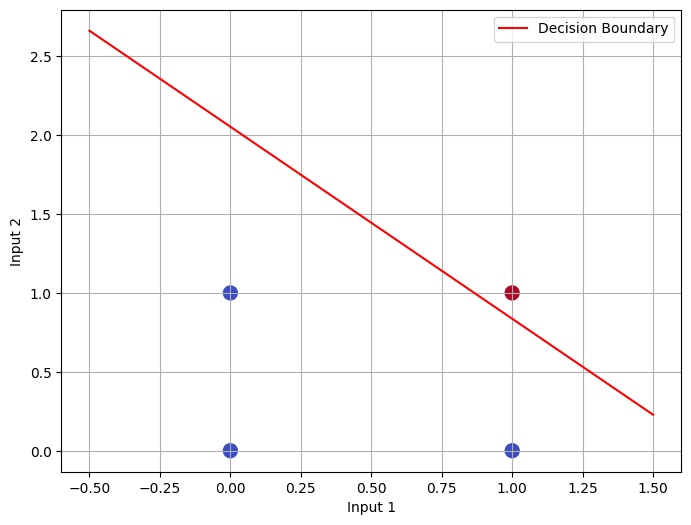

In [ ]:
plt.figure(figsize=(8, 6))
x1 = np.linspace(-0.5, 1.5, 100)
x2 = -(weights[0] * x1 + bias) / weights[1]
plt.plot(x1, x2, '-r', label='Decision Boundary')
plt.scatter(X[:, 0], X[:, 1], c=y.reshape(-1), cmap='coolwarm', s=100)
plt.xlabel('Input 1')
plt.ylabel('Input 2')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
print("最終的な予測:")
final_predictions = predict(X, weights, bias)
for x_i, y_i, pred in zip(X, y, final_predictions):
    print(f"入力: {x_i}, 出力: {y_i}, 予測: {pred[0]:.4f}")

print(f"\n最終の重み:{weights.flatten()}")
print(f"最終のバイアス:{bias[0]}")

最終的な予測:
入力: [0. 0.], 出力: [0.], 予測: 0.1201
入力: [0. 1.], 出力: [0.], 予測: 0.2647
入力: [1. 0.], 出力: [0.], 予測: 0.3076
入力: [1. 1.], 出力: [1.], 予測: 0.5396

最終の重み:[1.1803622  0.96998787]
最終のバイアス:-1.9917606115341187
